In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

df_real = pd.read_csv("director_avg.csv", sep=";", low_memory=False)
#df_real = df_real.values
df_real.drop('movie_nb_inclnodate', axis=1, inplace=True)
print(df_real.columns.values)

['director_name' 'movie_nb' 'min_date' 'max_date' 'career_middle_date'
 'avg_time' 'id' 'vote_count' 'release_date2' 'Drama' 'Crime' 'Action'
 'Documentary' 'Adventure' 'Animation' 'Comedy' 'Mystery' 'Horror'
 'Western' 'Science Fiction' 'Thriller' 'Romance' 'Fantasy' 'War' 'Family'
 'Music' 'History' 'TV Movie' 'Foreign' 'en' 'de' 'fr' 'es' 'pt' 'ja' 'it'
 'zh' 'sv' 'da' 'other']


In [3]:
#df_tr = df_real[0:10000]
df_tr = df_real
#liste des noms de réals en numpy array
director_names = df_tr['director_name'].values
#Exclusion des noms de réals (non numériques) pour le travail de clustering
df_tr2 = df_tr.iloc[:,1:]
#convert to numpy array
df_tr2 = df_tr2.values

In [4]:
#Méthode de normalisation choisie au hasard
scaler = StandardScaler()
scaler.fit(df_tr2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
np.mean(df_tr2[0])

25926.75641025641

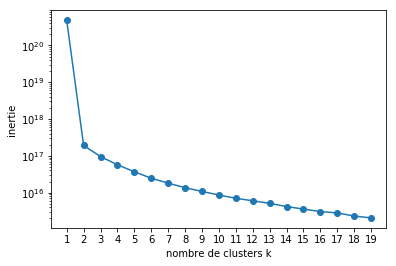

In [138]:
#On calcule l'inertie (coefficient d'éloignement moyen par rapport au centre des clusters) pour chaque nombre possible de cluster, pour essayer de trouver le nombre "idéal" pour nos données
#nombre de clusters testés: de 1 à 20
ks = range(1, 20)
inertias = []

for k in ks:
    # On fait KMeans avec k clusters
    model = KMeans(n_clusters=k)
    
    # On fitte le modèle aux données
    model.fit(df_tr2)
    
    # On calcule l'inertie (distance moyenne entre films et centre du cluster auquel il appartient)
    inertias.append(model.inertia_)
    
# on tracel'inertie en fonction des ks
plt.plot(ks, inertias, '-o')
plt.xlabel('nombre de clusters k')
plt.ylabel('inertie')
#échelle logarithmique pour les ordonnées
plt.yscale('log')
plt.xticks(ks)
plt.show()
#Conclusion: pas de nombre de clusters optimal...